**Part 1: Apriori Algorithm for Frequent Itemset Mining**

In this notebook, we detail an implementation of the apriori algorithm that can be applied to large datasets (refer to part 2 for big data application). Further, we compare the results from this implementation to those generated by the mlxtend library apriori algorithm and visualize the top 50 most frequent itemsets and association rules as bar plots.

In [1]:
!pip install efficient_apriori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from efficient_apriori import apriori as ap


basket = pd.read_csv("/content/Market_Basket_Optimisation.csv", header=None)
basket.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, we pad the baskets with zeros to make them all of the same length.

In [13]:
# Change nulls to 0
basket.fillna(0,inplace=True)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next, we process the data in order to turn it into a format suitable for the efficient_apriori implementation. We do this by converting the dataframe above into a list of transactions where each transaction is a list in itself.

In [14]:
# Convert DataFrame to list for processing

baskets = []

for i in range(0,len(basket)):
    baskets.append([str(basket.values[i,j]) for j in range(20) if str(basket.values[i,j])!='0'])

print(baskets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

We then run the efficient_apriori algorithm in the following cell. Note that the frequent itemsets are returned as a dictionary where the keys are the itemset lengths and the values are dictionaries of the itemsets themselves as keys and their corresponding (absolute) supports as values.

In [15]:
itemsets, rules = ap(baskets, min_support=6/len(baskets), min_confidence=0.5)
display(itemsets)
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{1: {('shrimp',): 536,
  ('almonds',): 153,
  ('avocado',): 250,
  ('vegetables mix',): 193,
  ('green grapes',): 68,
  ('whole weat flour',): 70,
  ('yams',): 86,
  ('cottage cheese',): 239,
  ('energy drink',): 200,
  ('tomato juice',): 228,
  ('low fat yogurt',): 574,
  ('green tea',): 991,
  ('honey',): 356,
  ('salad',): 37,
  ('mineral water',): 1788,
  ('salmon',): 319,
  ('antioxydant juice',): 67,
  ('frozen smoothie',): 475,
  ('spinach',): 53,
  ('olive oil',): 494,
  ('burgers',): 654,
  ('meatballs',): 157,
  ('eggs',): 1348,
  ('chutney',): 31,
  ('turkey',): 469,
  ('milk',): 972,
  ('energy bar',): 203,
  ('whole wheat rice',): 439,
  ('whole wheat pasta',): 221,
  ('french fries',): 1282,
  ('soup',): 379,
  ('light cream',): 117,
  ('shallot',): 58,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('pet food',): 49,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('oil',): 173,
  ('fresh tuna'

[{almonds, avocado} -> {frozen smoothie},
 {almonds, chicken} -> {burgers},
 {almonds, turkey} -> {burgers},
 {almonds, cereals} -> {green tea},
 {almonds, cereals} -> {spaghetti},
 {almonds, cooking oil} -> {chocolate},
 {almonds, olive oil} -> {chocolate},
 {almonds, pancakes} -> {chocolate},
 {almonds, french fries} -> {eggs},
 {almonds, fresh tuna} -> {mineral water},
 {almonds, fresh tuna} -> {spaghetti},
 {almonds, honey} -> {frozen smoothie},
 {almonds, grated cheese} -> {ground beef},
 {almonds, ground beef} -> {spaghetti},
 {almonds, honey} -> {spaghetti},
 {almonds, olive oil} -> {mineral water},
 {almonds, shrimp} -> {mineral water},
 {almonds, tomato sauce} -> {mineral water},
 {almonds, turkey} -> {mineral water},
 {almonds, whole wheat rice} -> {mineral water},
 {almonds, olive oil} -> {spaghetti},
 {almonds, tomatoes} -> {spaghetti},
 {antioxydant juice, cereals} -> {mineral water},
 {asparagus, chocolate} -> {mineral water},
 {avocado, black tea} -> {eggs},
 {avocado, b

In the cell below, we run the same dataset through the mlxtend implementation of apriori in order to compare the results and verify the correctness of the efficient apriori implementation.

In order to do so, we one-hot encode the dataframe using TransactionEncoder() to make it suitable for the mlxtend library implementation.

In [16]:
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_mlx = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_mlx, min_support=6/len(baskets), use_colnames=True)

rules_mlx = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

frequent_itemsets['support'] *= len(baskets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Display top 50 most frequent itemsets and rules to compare against efficient_apriori results
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
display(frequent_itemsets[:50])
display(rules_mlx[:50])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
71,1788.0,(mineral water)
36,1348.0,(eggs)
98,1306.0,(spaghetti)
42,1282.0,(french fries)
24,1229.0,(chocolate)
53,991.0,(green tea)
70,972.0,(milk)
54,737.0,(ground beef)
48,715.0,(frozen vegetables)
80,713.0,(pancakes)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(almonds, avocado)",(frozen smoothie),0.001733,0.063325,0.000933,0.538462,8.503158,0.000823,2.029463,0.883929
1,"(almonds, chicken)",(burgers),0.002400,0.087188,0.001333,0.555556,6.371899,0.001124,2.053826,0.845089
2,"(turkey, almonds)",(burgers),0.001200,0.087188,0.000800,0.666667,7.646279,0.000695,2.738435,0.870262
3,"(cereals, almonds)",(green tea),0.001067,0.132116,0.000800,0.750000,5.676842,0.000659,3.471537,0.824725
4,"(cereals, almonds)",(spaghetti),0.001067,0.174110,0.000800,0.750000,4.307619,0.000614,3.303560,0.768673
5,"(cooking oil, almonds)",(chocolate),0.001733,0.163845,0.000933,0.538462,3.286412,0.000649,1.811670,0.696925
6,"(olive oil, almonds)",(chocolate),0.002933,0.163845,0.001466,0.500000,3.051668,0.000986,1.672310,0.674288
7,"(pancakes, almonds)",(chocolate),0.003066,0.163845,0.001600,0.521739,3.184349,0.001097,1.748324,0.688074
8,"(almonds, french fries)",(eggs),0.004399,0.179709,0.002266,0.515152,2.866581,0.001476,1.691849,0.654030
9,"(fresh tuna, almonds)",(mineral water),0.001600,0.238368,0.000800,0.500000,2.097595,0.000419,1.523264,0.524102


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


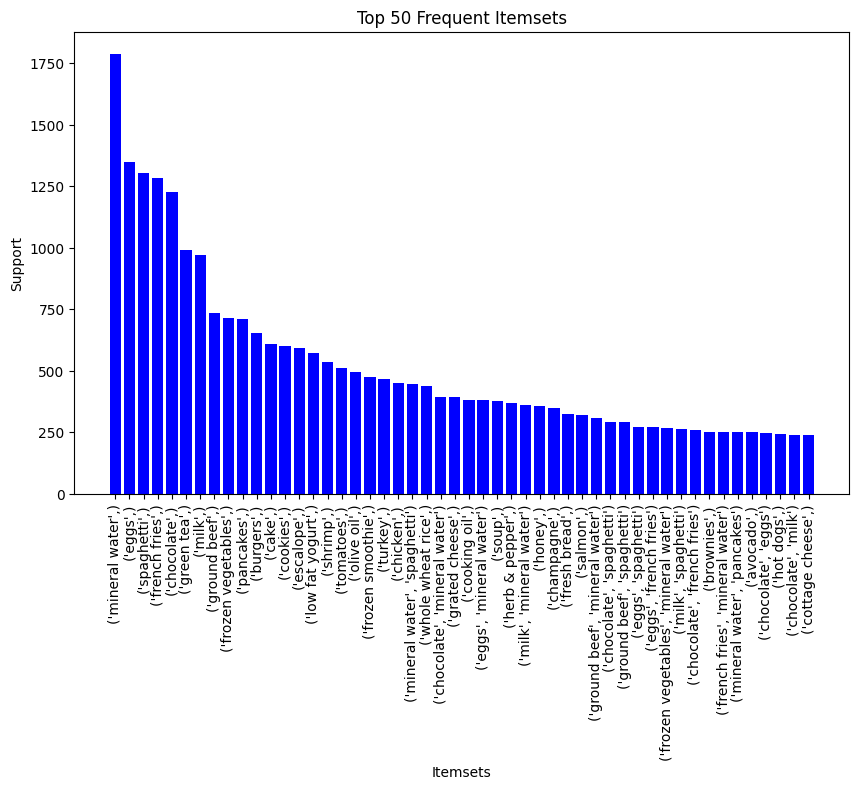

In [21]:
# Plot top 50 most frequent itemsets from efficient_apriori
all_itemsets = {}
for length, items in itemsets.items():
    all_itemsets.update(items)

top_itemsets = sorted(all_itemsets.items(), key=lambda x: x[1], reverse=True)[:50]
itemset_names = [str(itemset[0]) for itemset in top_itemsets]
support_values = [support for _, support in top_itemsets]

plt.figure(figsize=(10, 6))
plt.bar(itemset_names, support_values, color='blue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 50 Frequent Itemsets')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


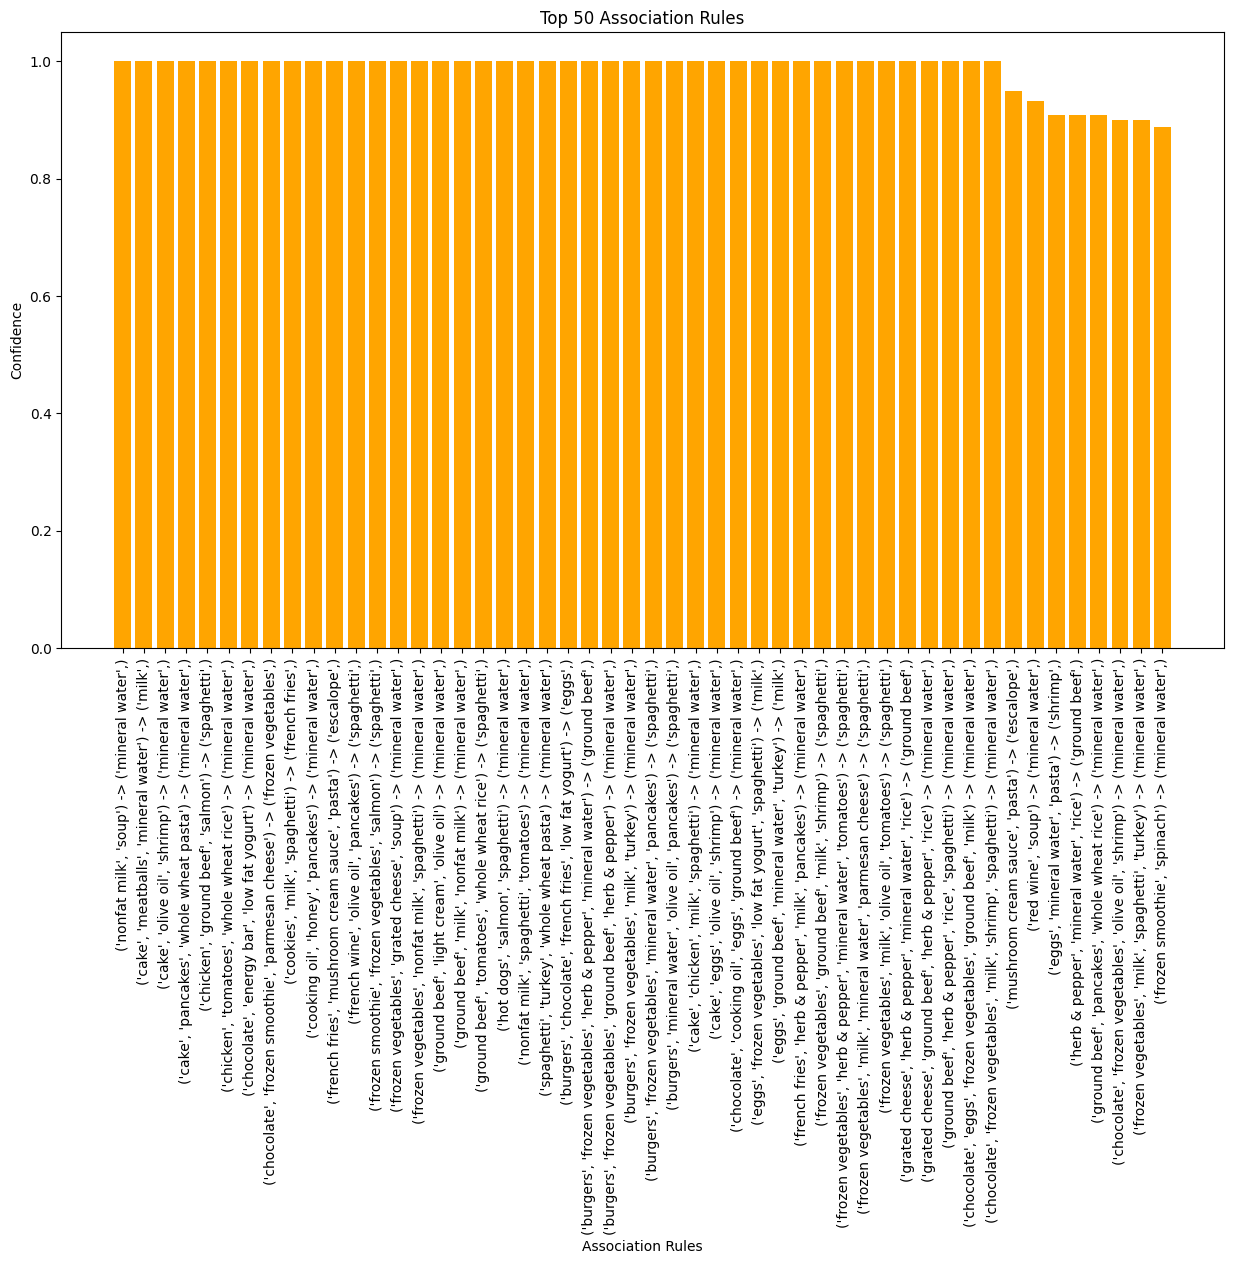

In [8]:
# Plot top 50 rules (in terms of confidence) generated by efficient_apriori
top_rules = sorted(rules, key=lambda x: x.confidence, reverse=True)[:50]
rule_names = [f"{str(rule.lhs)} -> {str(rule.rhs)}" for rule in top_rules]
confidence_values = [rule.confidence for rule in top_rules]

plt.figure(figsize=(15, 8))
plt.bar(rule_names, confidence_values, color='orange')
plt.xlabel('Association Rules')
plt.ylabel('Confidence')
plt.title('Top 50 Association Rules')
plt.xticks(rotation=90)
plt.show()